In [2]:
import os
import pandas as pd
import numpy as np
import mygene
import gseapy as gp
import gseapy.plot as gseaplot

from gseapy import enrichment_map
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

from gseapy.plot import barplot, dotplot

In [3]:
def get_top_ranked_genes(DEG, state):
    '''
    This function takes a DEG file path and number of genes as input and returns a list of top-ranked genes 
    with their ranks based on the DEG file.
    '''
    # Read the DEG file and calculate rank
    Calu3_12h_DEGs = pd.read_csv(DEG, sep=',')
    
    Calu3_12h_DEGs['log2FoldChange'] = np.log2(Calu3_12h_DEGs['norm_foldChange'])  

    
    if state == 'up':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] > 1) & (Calu3_12h_DEGs['pvalue.adj.FDR'] < 0.05)]
    if state == 'down':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] < -1) & (Calu3_12h_DEGs['pvalue.adj.FDR'] < 0.05)]
        
        
        
    Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['pvalue.adj.FDR'] < 0.05) & (Calu3_12h_DEGs['log2FoldChange'].abs() > 0.5)]
    Calu3_12h_DEGs['Rank'] = np.log10(Calu3_12h_DEGs['chi2LR1'])*Calu3_12h_DEGs.log2FoldChange

    
    Calu3_12h_DEGs = Calu3_12h_DEGs.sort_values('Rank', key= abs, ascending=False)

    ranking = Calu3_12h_DEGs['Rank']

    ranking = pd.DataFrame(ranking)

    # Annotate gene symbols using mygene package
    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(ranking.index, scopes='ensembl.gene')

    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format

    df = df.set_index('query')
    df['rank'] = ranking['Rank']
    
   
    return  df[['symbol','rank']].dropna(subset=['symbol'])

In [4]:
def enrich_genes(top_ranked_genes):

    enr_Reactome = gp.enrichr(gene_list=top_ranked_genes,
                                 gene_sets=['Reactome_2022'],
                                 organism='Human', 
                                 cutoff=0.25)
    
    enr_GOBP = gp.enrichr(gene_list=top_ranked_genes,
                             gene_sets=['GO_Biological_Process_2021'],
                             organism='Human', 
                             cutoff=0.25)
    
    enr_GOMF = gp.enrichr(gene_list=top_ranked_genes ,
                             gene_sets=['GO_Molecular_Function_2021'],
                             organism='Human', 
                             cutoff=0.25)
    
    
    # Write results to CSV files
    #file_name = os.path.basename(file_path).split('.')[0]
    #enr_Reactome_up.results.to_csv(f'{file_name}_enr_Reactome.csv')
    
    return enr_Reactome, enr_GOBP, enr_GOMF

In [5]:
!ls

0X_calu3_desingle_GSEA_map.ipynb
24_Enrichment_barplots_by_hrs_single.ipynb
calu3_enrichment_maps.png
desingle_calu3_12h.csv
desingle_calu3_12h_enr_Reactome.csv
desingle_calu3_12h_enr_bio_proc.csv
desingle_calu3_12h_enr_component.csv
desingle_calu3_12h_enr_molec_func.csv
desingle_calu3_8h.csv
desingle_calu3_8h_enr_Reactome.csv
desingle_calu3_8h_enr_bio_proc.csv
desingle_calu3_8h_enr_component.csv
desingle_calu3_8h_enr_molec_func.csv
single_calu3_DEGs_down_12.csv
single_calu3_DEGs_down_8.csv
single_calu3_DEGs_up_12.csv
single_calu3_DEGs_up_8.csv


In [6]:
DEG_12 = '/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/desingle_calu3_12h.csv'
DEG_8 = '/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/desingle_calu3_8h.csv'


DEGs_up_12 = get_top_ranked_genes(DEG_12, 'up')
DEGs_down_12 = get_top_ranked_genes(DEG_12, 'down')


DEGs_up_8 = get_top_ranked_genes(DEG_8, 'up')
DEGs_down_8 = get_top_ranked_genes(DEG_8, 'down')


enr_Reactome_up_12, enr_GOBP_up_12, enr_GOMF_up_12 = enrich_genes(DEGs_up_12)
enr_Reactome_up_8, enr_GOBP_up_8, enr_GOMF_up_8 = enrich_genes(DEGs_up_8)


enr_Reactome_down_8, enr_GOBP_down_8, enr_GOMF_down_8 = enrich_genes(DEGs_down_8)
enr_Reactome_down_12, enr_GOBP_down_12, enr_GOMF_down_12 = enrich_genes(DEGs_down_12)

querying 1-2...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
Finished.
querying 1-1000...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-4435...done.
Finished.
12 input query terms found no hit:
	['ENSG00000256045', 'ENSG00000270672', 'ENSG00000256618', 'ENSG00000255823', 'ENSG00000271043', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-121...done.
Finished.
querying 1-317...done.
Finished.
1 input query terms found no hit:
	['ENSG00000204092']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [21]:
set(enr_Reactome_up_12.res2d['Term'].head(10)) 
#set(enr_Reactome_up_8.res2d['Term'].head(20)) 

{'Defective B3GALTL Causes PpS R-HSA-5083635',
 'Disease R-HSA-1643685',
 'Diseases Associated With O-glycosylation Of Proteins R-HSA-3906995',
 'Diseases Of Glycosylation R-HSA-3781865',
 'Diseases Of Metabolism R-HSA-5668914',
 'Metabolism Of Proteins R-HSA-392499',
 'O-glycosylation Of TSR Domain-Containing Proteins R-HSA-5173214',
 'O-linked Glycosylation R-HSA-5173105',
 'Post-translational Protein Modification R-HSA-597592'}

No enriched terms found for GO Reactome, 8 hpi 1 (downregulated). Subplot left blank.


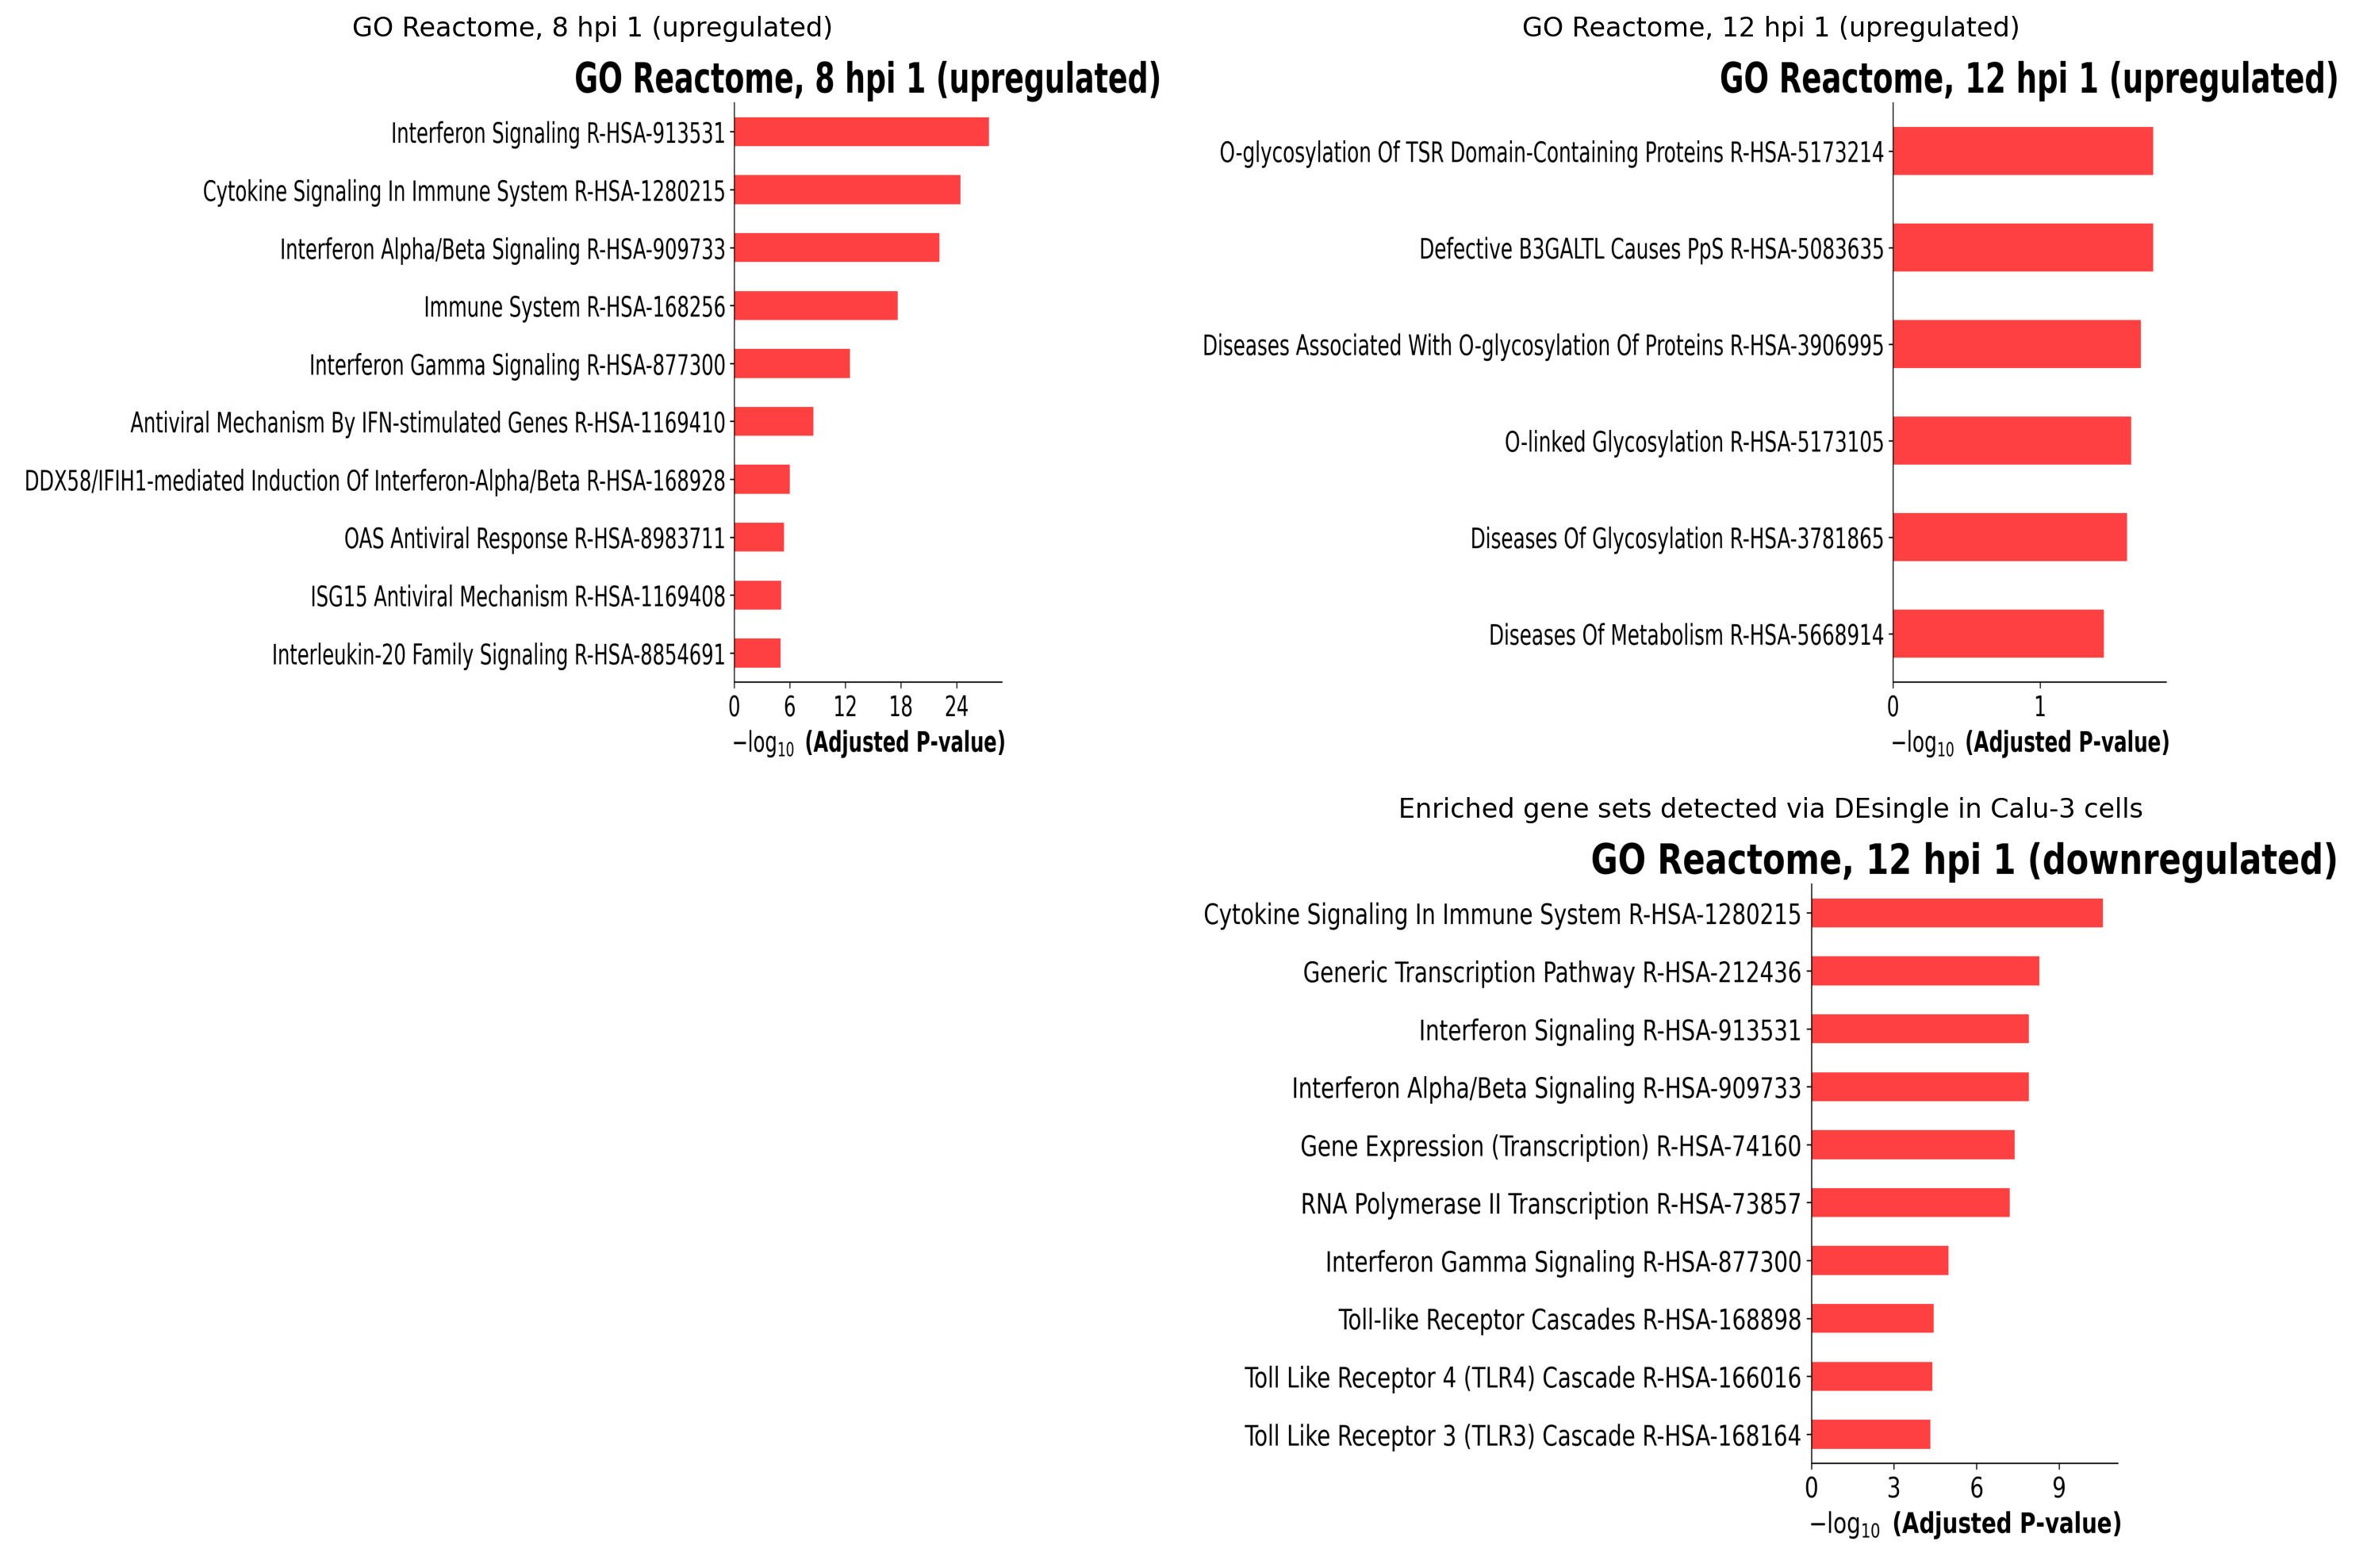

In [10]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Define a function to handle plotting with error checking
def plot_barplot(enr, title, color, buf):
    try:
        barplot(enr.res2d, title=title, color=color, ofname=buf)
        buf.seek(0)
        img = Image.open(buf)
        axs[i, j].imshow(img, aspect='auto')
        axs[i, j].set_title(title)
    except ValueError as e:
        if str(e) == 'Warning: No enrich terms when cutoff = 0.05':
            print(f'No enriched terms found for {title}. Subplot left blank.')
        else:
            raise e

# Loop over conditions and timepoints
for i, cond in enumerate(['up', 'down']):
    for j, timepoint in enumerate([8, 12]):
        buf = BytesIO()
        title = f'GO Reactome, {timepoint} hpi 1 ({cond}regulated)'
        enr = globals().get(f'enr_Reactome_{cond}_{timepoint}')
        plot_barplot(enr, title, 'r', buf)

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')
    
    
plt.title('Enriched gene sets detected via DEsingle in Calu-3 cells')

plt.tight_layout()
plt.show()


In [8]:
DEGs_up_8.to_csv('single_calu3_DEGs_up_8.csv')
DEGs_up_12.to_csv('single_calu3_DEGs_up_12.csv')

DEGs_down_8.to_csv('single_calu3_DEGs_down_8.csv')
DEGs_down_12.to_csv('single_calu3_DEGs_down_12.csv')